In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split

%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
'''
Анализ датасета "Титаник". Анализ выживших и предсказание с параметрами пол, возраст, класс пассажира.
'''

In [ ]:
'''
Грузим датасет, разбиваем на части (train и test)
'''

In [5]:
titanic_train = pd.read_csv('train.csv')

X = titanic_train.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = titanic_train.Survived

X = pd.get_dummies(X) # разбиваем колонки на несколько

X = X.fillna({'Age': X.Age.median()}) # заполняем пропуски

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

clf = tree.DecisionTreeClassifier(criterion='entropy',
                                  max_depth=3,
                                  min_samples_split=100,
                                  min_samples_leaf=10)


In [ ]:
'''
Строим дерево решений.
'''

[Text(0.5, 0.875, 'Sex_female <= 0.5\nentropy = 0.953\nsamples = 596\nvalue = [374, 222]'),
 Text(0.2, 0.625, 'Age <= 3.5\nentropy = 0.696\nsamples = 390\nvalue = [317, 73]'),
 Text(0.1, 0.375, 'entropy = 0.779\nsamples = 13\nvalue = [3, 10]'),
 Text(0.3, 0.375, 'Fare <= 52.277\nentropy = 0.651\nsamples = 377\nvalue = [314, 63]'),
 Text(0.2, 0.125, 'entropy = 0.58\nsamples = 332\nvalue = [286, 46]'),
 Text(0.4, 0.125, 'entropy = 0.956\nsamples = 45\nvalue = [28, 17]'),
 Text(0.8, 0.625, 'Pclass <= 2.5\nentropy = 0.851\nsamples = 206\nvalue = [57, 149]'),
 Text(0.7, 0.375, 'Fare <= 149.035\nentropy = 0.23\nsamples = 107\nvalue = [4, 103]'),
 Text(0.6, 0.125, 'entropy = 0.149\nsamples = 94\nvalue = [2, 92]'),
 Text(0.8, 0.125, 'entropy = 0.619\nsamples = 13\nvalue = [2, 11]'),
 Text(0.9, 0.375, 'entropy = 0.996\nsamples = 99\nvalue = [53, 46]')]

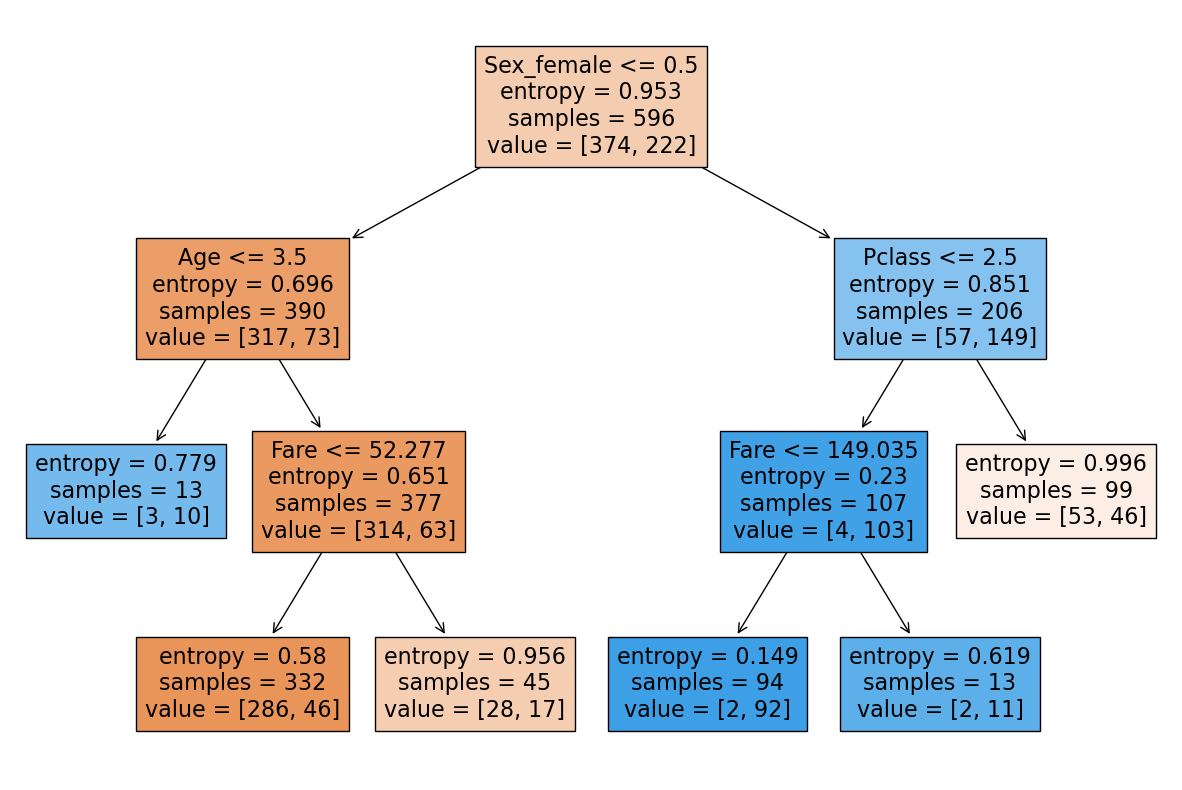

In [6]:
clf.fit(X_train, y_train)

plt.figure(figsize=(15, 10))
tree.plot_tree(clf, filled=True, feature_names=list(X))

In [ ]:
'''
Результат
'''

In [8]:
clf.score(X_test, y_test)

0.7762711864406779

In [ ]:
'''
Вероятность выжить у женщины 0.77627
'''

In [10]:
clf_rf = RandomForestClassifier()

In [ ]:
'''
Зададим параметры n_estimators, равным 10, 20, 30
и max_depth, 2, 5, 7, 10
'''

In [11]:
parametrs = {'n_estimators': [10, 20, 30], 'max_depth': [2, 5, 7, 10]}

In [12]:
grid_search_cv_clf = GridSearchCV(clf_rf, parametrs, cv=5)

In [13]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 7, 10],
                         'n_estimators': [10, 20, 30]})

In [ ]:
'''
Посмотрим лучшые значения параметров
'''

In [17]:
grid_search_cv_clf.best_params_

{'max_depth': 5, 'n_estimators': 10}

In [ ]:
'''
Посмотрим на общее предсказание.
'''

In [14]:
grid_search_cv_clf.score(X_test, y_test)

0.8067796610169492

In [ ]:
'''
Вероятность выжить у женщины 0.80678
'''